In [79]:
from google .colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rratchana","key":"57d2ba1408293ff977e5dec7b83aa9b2"}'}

In [80]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [81]:
!pip install kaggle

In [82]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p /content/breast-cancer --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 88.5MB/s]


In [83]:
import pandas as pd
df = pd.read_csv('/content/breast-cancer/data.csv')

In [84]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [85]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [86]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [87]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

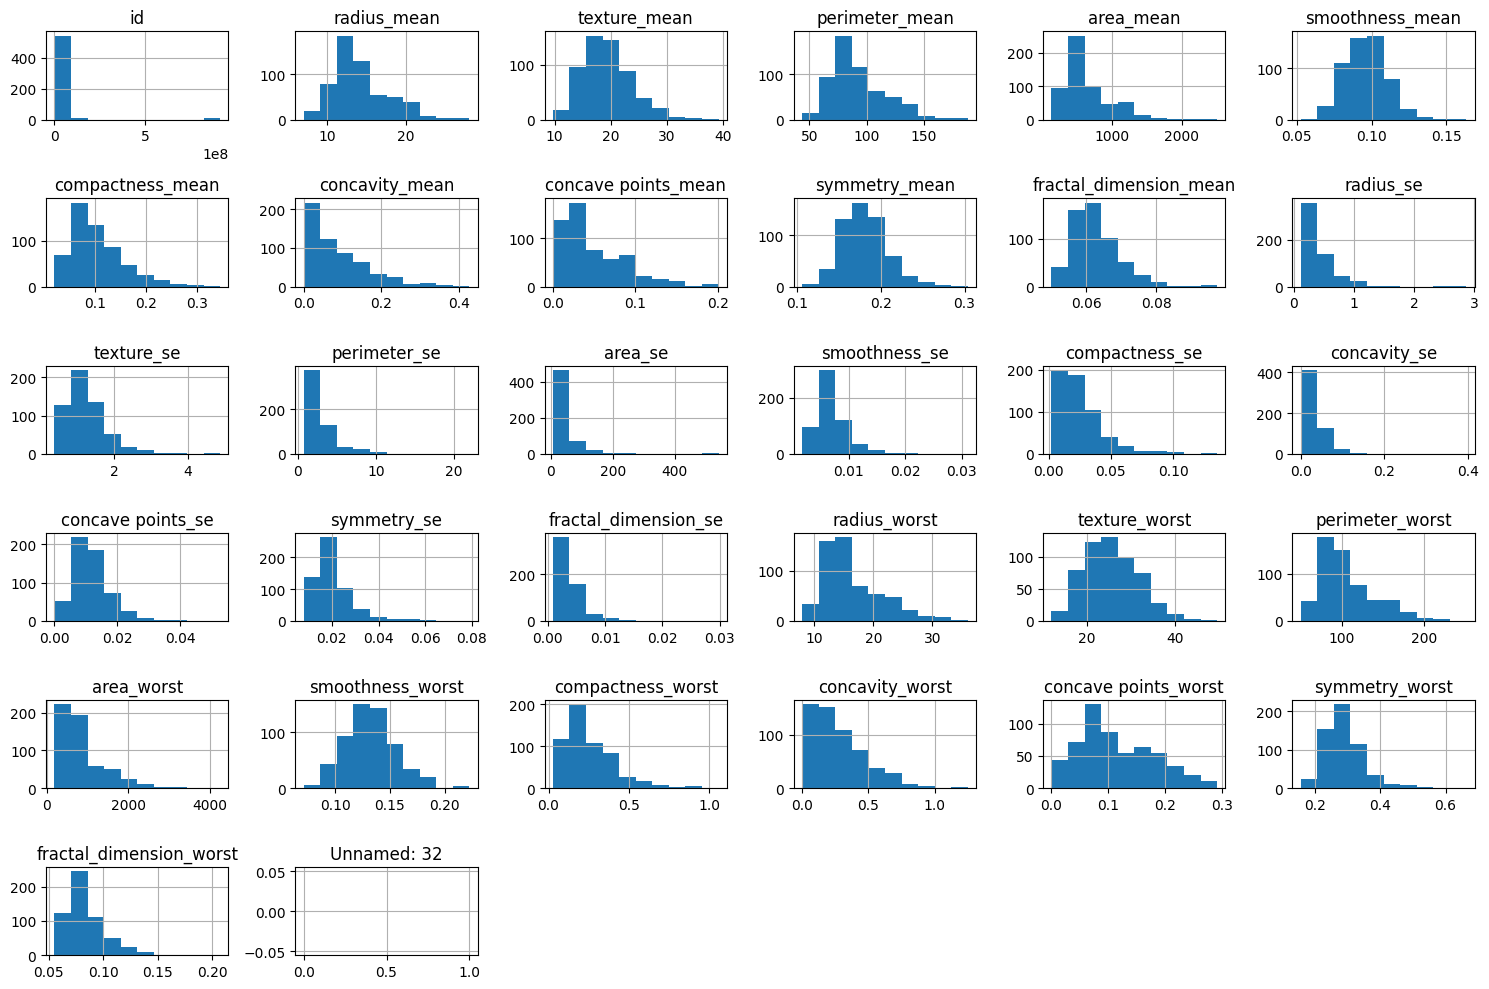

In [89]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

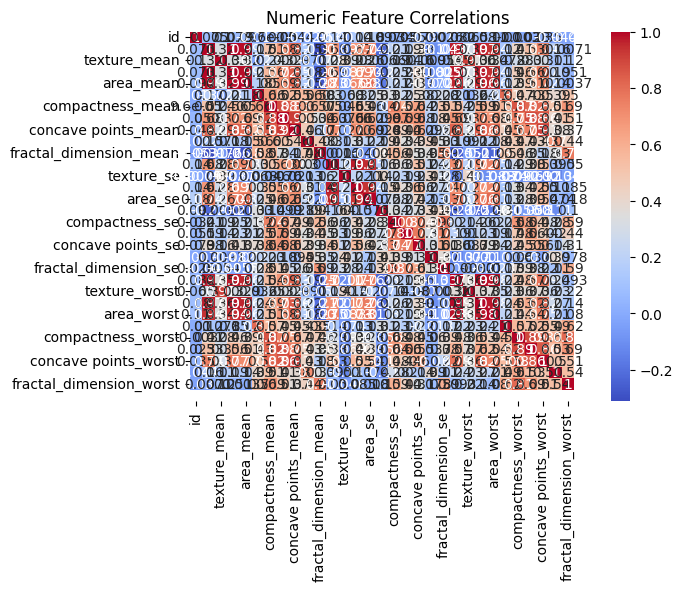

In [90]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

In [94]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

# Drop empty column if present
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

In [95]:
# Drop ID and diagnosis (target)
X = df.drop(['id', 'diagnosis'], axis=1)

# Target: Malignant (M) = 1, Benign (B) = 0
Y = df['diagnosis'].map({'M': 1, 'B': 0})

In [96]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [97]:
print("Final feature columns:", X.columns)
print("Target distribution:\n", Y.value_counts())

Final feature columns: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Target distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

new value = {X-mean}/standard deviation

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [104]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
results = {}

**Model evaluation**

In [105]:
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(Y_test, preds))


Logistic Regression Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Random Forest Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96   

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train logistic regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, Y_train)

# Predictions
Y_pred_lr = lr_model.predict(X_test_scaled)

# Accuracy + report
print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print(classification_report(Y_test, Y_pred_lr))


Logistic Regression Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [108]:
from sklearn.metrics import confusion_matrix

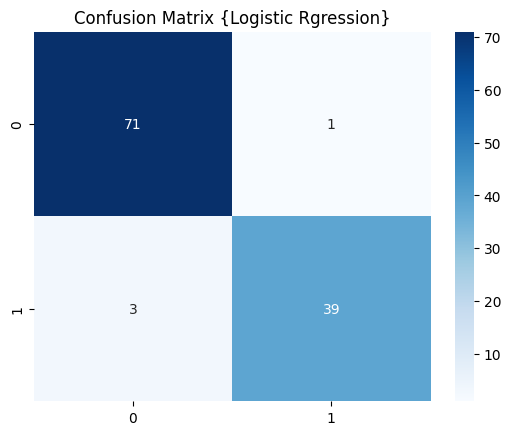

In [109]:
cm = confusion_matrix(Y_test, Y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix {Logistic Rgression}')
plt.show()

Day 4: Random Forest, and Feature Importance

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)
Y_pred_rf = rf_model.predict(X_test_scaled)

In [112]:
print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.9736842105263158


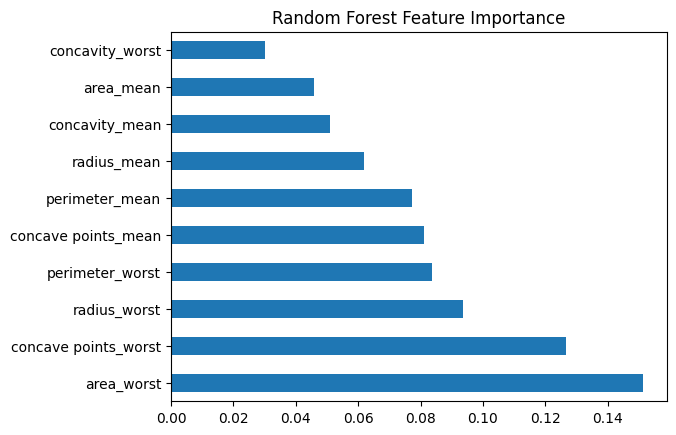

In [113]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh') #to take only top 10 features
plt.title('Random Forest Feature Importance')
plt.show()

Save the model into an evironment

In [114]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [126]:
# Save just the column headers as template (Breast Cancer)
pd.DataFrame(columns=X.columns).to_csv('Breast_user_template.csv', index=False)
print("✅ User Template saved as 'Breast_user_template.csv'")

pd.DataFrame([X.iloc[0].values], columns=X.columns).to_csv('Breast_user_template.csv', index=False)
print("✅ Breast Cancer User Template saved with one example row")

✅ User Template saved as 'Breast_user_template.csv'
✅ Breast Cancer User Template saved with one example row
